# Logistic Regression with Python

## 1. Logistic Regression

### 1.1. Import libraries

In [1]:
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

### 1.2. Load data

In [2]:
DATA_FILE = "w3/ex2data1.txt"

In [3]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [4]:
X = data[:,:2]  # exam scores
Y = data[:,2]  # admission decision

### 1.3. Explorer data

In [5]:
print("number of samples = %s" % X.shape[0])

number of samples = 100


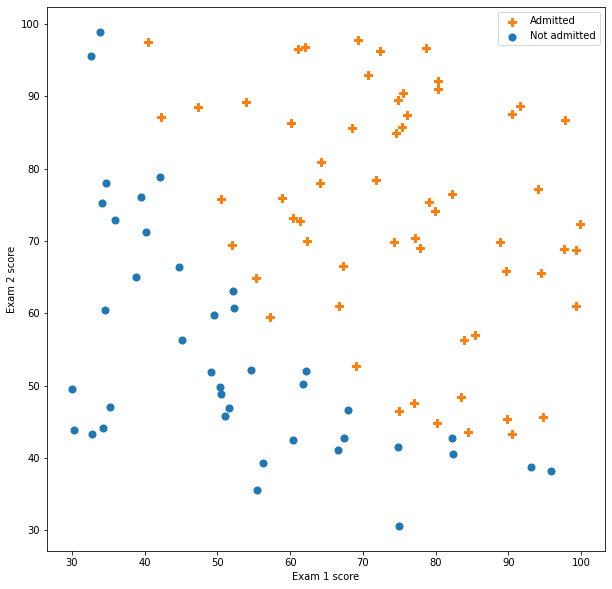

In [6]:
scale = 50

fig = plt.figure(figsize=(10,10))
plt.scatter(X[Y==1,0], X[Y==1,1], label="Admitted", s=scale, marker="P", c="#ff7f0e")
plt.scatter(X[Y==0,0], X[Y==0,1], label="Not admitted", s=scale, marker="o", c="#1f77b4")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

fig.savefig('images/logistic_regression_admission.svg', bbox_inches='tight')

### 1.4. Define functions

In [7]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def estimate(w, X):
    Z = np.matmul(X, w)
    Yh = sigmoid(Z)
    return Yh

def cost_func(w, X, Y):
    Yh = estimate(w, X)
    c0 = -np.matmul(Y.T, np.log(Yh))
    c1 = -np.matmul((1-Y).T, np.log(1-Yh))
    cost = (c0 + c1)/len(X)
    return cost

def gradient(w, X, Y):
    Yh = estimate(w, X)
    D = Yh - Y
    grad = np.matmul(X.T, D)/len(X)
    return grad

def predict(w, X):
    Yh = estimate(w, X)
    P = np.array([1. if p >= 0.5 else 0. for p in Yh])
    return P

### 1.5. Prepare data

In [8]:
X = np.column_stack((np.ones(X.shape[0]), X))

### 1.6. Verify functions

In [9]:
w = np.zeros(X.shape[1])
cost = cost_func(w, X, Y)  # expected value: 0.693
grad = gradient(w, X, Y)  # expected value: -0.1 -12.0092 -11.2628
print("cost = {}".format(round(cost, 3)))
print("grad = {}".format(np.round(grad, 4)))

cost = 0.693
grad = [ -0.1    -12.0092 -11.2628]


In [10]:
w = np.array([-24, 0.2, 0.2])
cost = cost_func(w, X, Y)  # expected value: 0.218
grad = gradient(w, X, Y)  # expected value: 0.043 2.566 2.647
print("cost = {}".format(round(cost, 3)))
print("grad = {}".format(np.round(grad, 3)))

cost = 0.218
grad = [0.043 2.566 2.647]


### 1.7. Optimizing

In [11]:
w = np.zeros(X.shape[1])  # initialize weights
w_opt,_,_ = opt.fmin_tnc(func=cost_func, x0=w, fprime=gradient, args=(X, Y))

In [12]:
print("weights = {}".format(np.round(w_opt, 3)))  # expected value: -25.161 0.206 0.201
cost = cost_func(w_opt, X, Y)  # expected value: 0.203
print("cost = {}".format(round(cost, 3)))

weights = [-25.161   0.206   0.201]
cost = 0.203


### 1.8. Evaluate

In [13]:
# predict
Xt = np.array([1, 45, 85])
Yh = estimate(w_opt, Xt)  # expected value: 0.775 +/- 0.002
print("Admission probability of a student with scores 45 and 85 is: {}".format(round(Yh, 3)))

Admission probability of a student with scores 45 and 85 is: 0.776


In [14]:
P = predict(w_opt, X)
acc = np.sum(P==Y)/len(Y)*100
print("Train Accuracy: {}%".format(acc))  # expected value: 89.0

Train Accuracy: 89.0%


### 1.9. Visualization

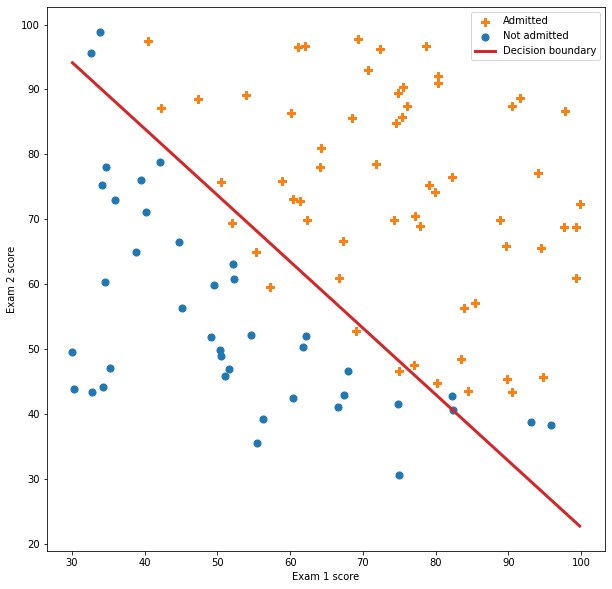

In [15]:
Xd = np.array([np.min(X[:,1]), np.max(X[:,1])])
Yd = (Xd*w_opt[1]+w_opt[0])/(-w_opt[2])
scale = 50

fig = plt.figure(figsize=(10,10))
sc1 = plt.scatter(X[Y==1,1], X[Y==1,2], label="Admitted", s=scale, marker="P", c="#ff7f0e")
sc2 = plt.scatter(X[Y==0,1], X[Y==0,2], label="Not admitted", s=scale, marker="o", c="#1f77b4")
ln = plt.plot(Xd, Yd, label="Decision boundary", linewidth=3, color="#d62728")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend([sc1, sc2, ln[0]], [sc1.get_label(), sc2.get_label(), ln[0].get_label()])
plt.show()

fig.savefig('images/logistic_regression_admission_result.svg', bbox_inches='tight')

## 2. Regularized Logistic Regression

### 2.1. Load data

In [16]:
DATA_FILE = "w3/ex2data2.txt"

In [17]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [18]:
X = data[:,:2]  # microchip tests scores
Y = data[:,2]  # QA decision

### 2.2. Explorer data

In [19]:
print("number of samples = %s" % X.shape[0])

number of samples = 118


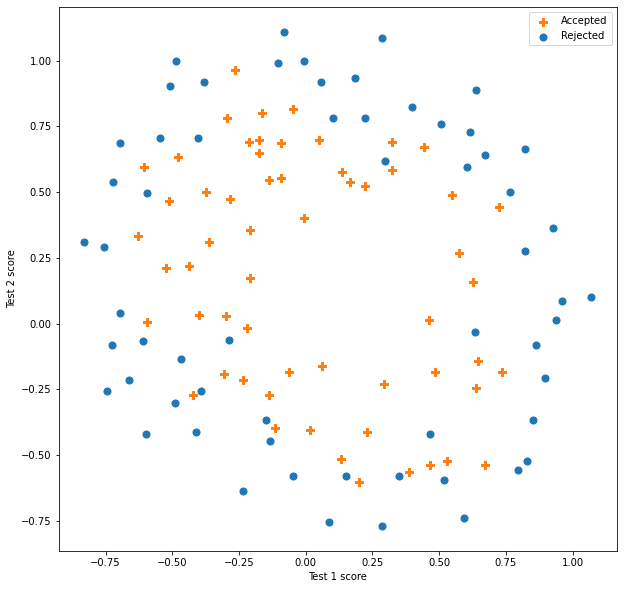

In [20]:
scale = 50

fig = plt.figure(figsize=(10,10))
plt.scatter(X[Y==1,0], X[Y==1,1], label="Accepted", s=scale, marker="P", c="#ff7f0e")
plt.scatter(X[Y==0,0], X[Y==0,1], label="Rejected", s=scale, marker="o", c="#1f77b4")
plt.xlabel("Test 1 score")
plt.ylabel("Test 2 score")
plt.legend()
plt.show()

fig.savefig('images/logistic_regression_qa.svg', bbox_inches='tight')

### 2.3. Define functions

In [21]:
def map_feature(X1, X2, degree=6):
    nb_features = (degree+1)*(degree+2)/2
    nb_features = int(nb_features)
    m = len(X1) if X1.size > 1 else 1
    X = np.ones((m, nb_features))
    idx = 1
    for i in range(1,degree+1):
        for j in range(i+1):
            T = (X1**(i-j))*(X2**j)
            X[:,idx] = T
            idx += 1
    return X

def cost_func_reg(w, X, Y, ld):
    cost = cost_func(w, X, Y)
    cost += np.sum(w[1:]**2)*ld/(2*len(X))
    return cost

def gradient_reg(w, X, Y, ld):
    grad = gradient(w, X, Y)
    grad[1:] = grad[1:] + w[1:]*ld/len(X)
    return grad

def generate_contour_data(w_opt):
    U = np.linspace(-1, 1.5, 50)
    V = np.linspace(-1, 1.5, 50)

    Z = np.zeros((len(U), len(V)))
    for i in range(len(U)):
        for j in range(len(V)):
            Ui = np.array(U[i])
            Vj = np.array(V[j])
            Z[i,j] = np.matmul(map_feature(Ui, Vj), w_opt)
    Z = Z.T
    return U, V, Z

### 2.4. Prepare data

In [22]:
X1 = X[:,0]
X2 = X[:,1]
X = map_feature(X1, X2)

### 2.5. Verify functions

In [23]:
w = np.zeros(X.shape[1])
ld = 1
cost = cost_func_reg(w, X, Y, ld)  # expected value: 0.693
grad = gradient_reg(w, X, Y, ld)  # expected value (first element): 0.0085 0.0188 0.0001 0.0503 0.0115
print("cost = {}".format(round(cost, 3)))
print("first five elements of grad: {}".format(np.round(grad[0:5], 4)))

cost = 0.693
first five elements of grad: [0.0085 0.0188 0.0001 0.0503 0.0115]


In [24]:
w = np.ones(X.shape[1])
ld = 10
cost = cost_func_reg(w, X, Y, ld)  # expected value: 3.16
grad = gradient_reg(w, X, Y, ld)  # expected value (first element): 0.3460 0.1614 0.1948 0.2269 0.0922
print("cost = {}".format(round(cost, 2)))
print("first five elements of grad: {}".format(np.round(grad[0:5], 4)))

cost = 3.16
first five elements of grad: [0.346  0.1614 0.1948 0.2269 0.0922]


### 2.6. Optimizing

In [25]:
w = np.zeros(X.shape[1])  # initialize weights
ld = 1
w_opt,_,_ = opt.fmin_tnc(func=cost_func_reg, x0=w, fprime=gradient_reg, args=(X, Y, ld))

### 2.7. Evaluate

In [26]:
P = predict(w_opt, X)
acc = sum(P==Y)/len(Y)*100
print("Train Accuracy = {}%".format(round(acc,1)))  # expected value: 83.1

Train Accuracy = 83.1%


### 2.8. Visualization

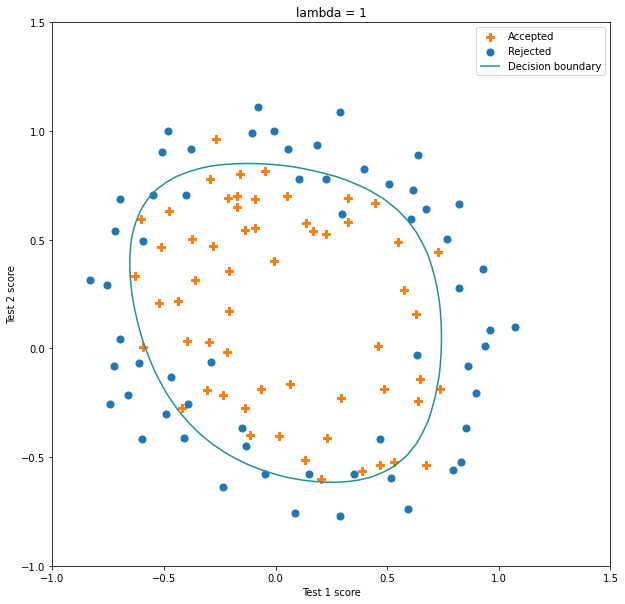

In [27]:
U, V, Z = generate_contour_data(w_opt)
scale = 50

fig = plt.figure(figsize=(10,10))
sc1 = plt.scatter(X[Y==1,1], X[Y==1,2], label="Accepted", s=scale, marker="P", c="#ff7f0e")
sc2 = plt.scatter(X[Y==0,1], X[Y==0,2], label="Rejected", s=scale, marker="o", c="#1f77b4")
cs = plt.contour(U, V, Z, 0)
handles,_ = cs.legend_elements()
plt.xlabel("Test 1 score")
plt.ylabel("Test 2 score")
plt.title("lambda = 1")
plt.legend([sc1, sc2, handles[1]], [sc1.get_label(), sc2.get_label(), "Decision boundary"])
plt.show()

fig.savefig('images/logistic_regression_qa_result.svg', bbox_inches='tight')

### 2.9. Play with lambda

#### lambda = 0

In [28]:
# optimizing
ld = 0
w_opt,_,_ = opt.fmin_tnc(func=cost_func_reg, x0=w, fprime=gradient_reg, args=(X, Y, ld))

In [29]:
P = predict(w_opt, X)
acc = sum(P==Y)/len(Y)*100
print("Train Accuracy = {}%".format(round(acc,1)))

Train Accuracy = 86.4%


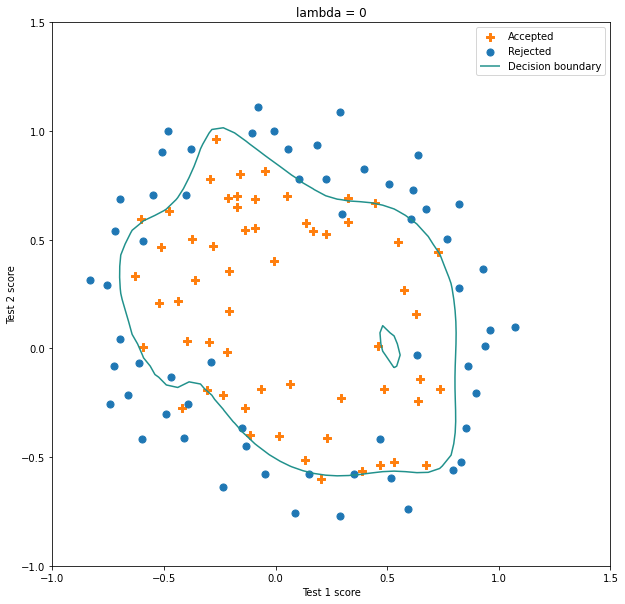

In [30]:
# visualization
U, V, Z = generate_contour_data(w_opt)
scale = 50

fig = plt.figure(figsize=(10,10))
sc1 = plt.scatter(X[Y==1,1], X[Y==1,2], label="Accepted", s=scale, marker="P", c="#ff7f0e")
sc2 = plt.scatter(X[Y==0,1], X[Y==0,2], label="Rejected", s=scale, marker="o", c="#1f77b4")
cs = plt.contour(U, V, Z, 0)
handles,_ = cs.legend_elements()
plt.xlabel("Test 1 score")
plt.ylabel("Test 2 score")
plt.title("lambda = 0")
plt.legend([sc1, sc2, handles[1]], [sc1.get_label(), sc2.get_label(), "Decision boundary"])
plt.show()

#### lambda = 100

In [31]:
# optimizing
ld = 100
w_opt,_,_ = opt.fmin_tnc(func=cost_func_reg, x0=w, fprime=gradient_reg, args=(X, Y, ld))

In [32]:
P = predict(w_opt, X)
acc = sum(P==Y)/len(Y)*100
print("Train Accuracy = {}%".format(round(acc,1)))

Train Accuracy = 61.0%


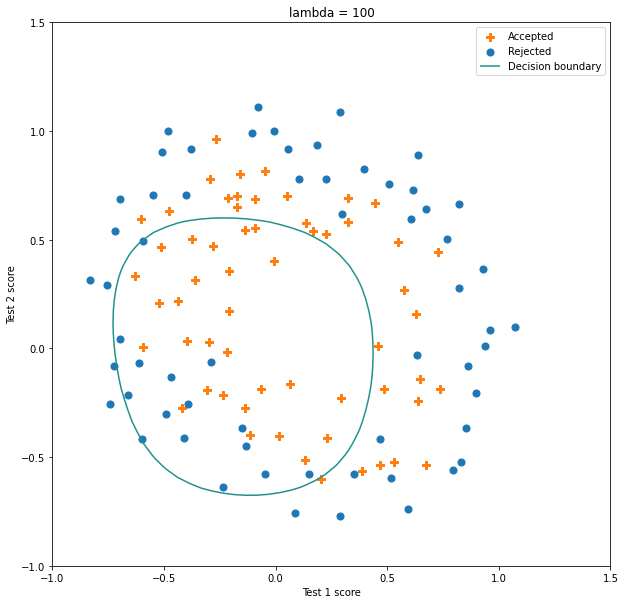

In [33]:
# visualization
U, V, Z = generate_contour_data(w_opt)
scale = 50

fig = plt.figure(figsize=(10,10))
sc1 = plt.scatter(X[Y==1,1], X[Y==1,2], label="Accepted", s=scale, marker="P", c="#ff7f0e")
sc2 = plt.scatter(X[Y==0,1], X[Y==0,2], label="Rejected", s=scale, marker="o", c="#1f77b4")
cs = plt.contour(U, V, Z, 0)
handles,_ = cs.legend_elements()
plt.xlabel("Test 1 score")
plt.ylabel("Test 2 score")
plt.title("lambda = 100")
plt.legend([sc1, sc2, handles[1]], [sc1.get_label(), sc2.get_label(), "Decision boundary"])
plt.show()